In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df_freight = pd.read_csv('data/freight_cost.csv')
df_oil = pd.read_csv('data/oil_cost.csv')

In [4]:
df_freight.head(5)

,Date,Price,Open,High,Low,Vol.,Change %
0,09/01/2019,70.86,70.86,70.86,70.86,NaN,0.23%
1,08/01/2019,70.70,70.70,70.70,70.70,NaN,1.25%
2,07/01/2019,69.83,69.83,69.83,69.83,NaN,1.32%
3,06/01/2019,68.92,68.92,68.92,68.92,NaN,2.06%
4,05/01/2019,67.53,67.53,67.53,67.53,NaN,0.03%


In [5]:
df_oil.head(5)

,Год,Реальная цена долларов за баррель,Актуализация на 2013
0,1861,0.49,12.65
1,1862,1.05,24.40
2,1863,3.15,59.36
3,1864,8.06,119.56
4,1865,6.59,99.88


In [6]:
df_freight = df_freight.drop('Vol.', axis=1)
df_freight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      192 non-null    object 
 1   Price     192 non-null    float64
 2   Open      192 non-null    float64
 3   High      192 non-null    float64
 4   Low       192 non-null    float64
 5   Change %  192 non-null    object 
dtypes: float64(4), object(2)
memory usage: 9.1+ KB


In [7]:
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

df_freight['Year'] = pd.to_datetime(df_freight['Date'], format='%d/%m/%Y').dt.year

df_oil.rename(columns={'Год': 'Year'}, inplace=True)


In [8]:
df_freight_yearly = df_freight.groupby('Year').agg({'Price': 'mean'}).reset_index()
df_freight_yearly.rename(columns={'Price': 'Freight'}, inplace=True)
df_oil.rename(columns={'Реальная цена долларов за баррель': 'Oil'}, inplace=True)
# Объединение данных по году
merged_df = pd.merge(df_freight_yearly, df_oil, on='Year', how='inner')
merged_df = merged_df.drop('Актуализация на 2013' , axis=1)

merged_df.head(5)

,Year,Freight,Oil
0,2003,65.396667,28.83
1,2004,88.311667,38.27
2,2005,114.921667,54.52
3,2006,117.786667,65.14
4,2007,125.166667,72.39


Text(0.5, 1.0, 'Корреляция цен на нефть и стоимости фрахта')

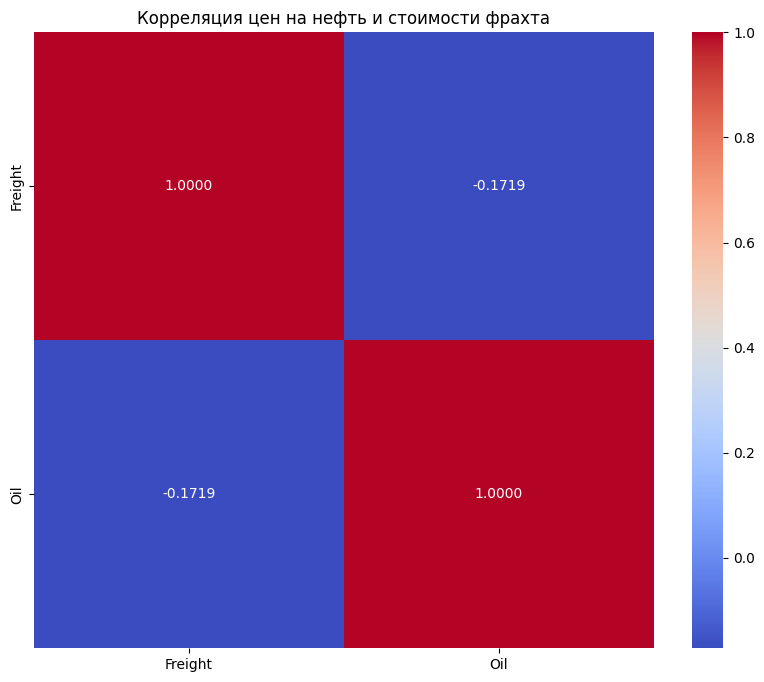

In [9]:
correlation_matrix = merged_df.drop('Year', axis=1).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.4f')
plt.title('Корреляция цен на нефть и стоимости фрахта')


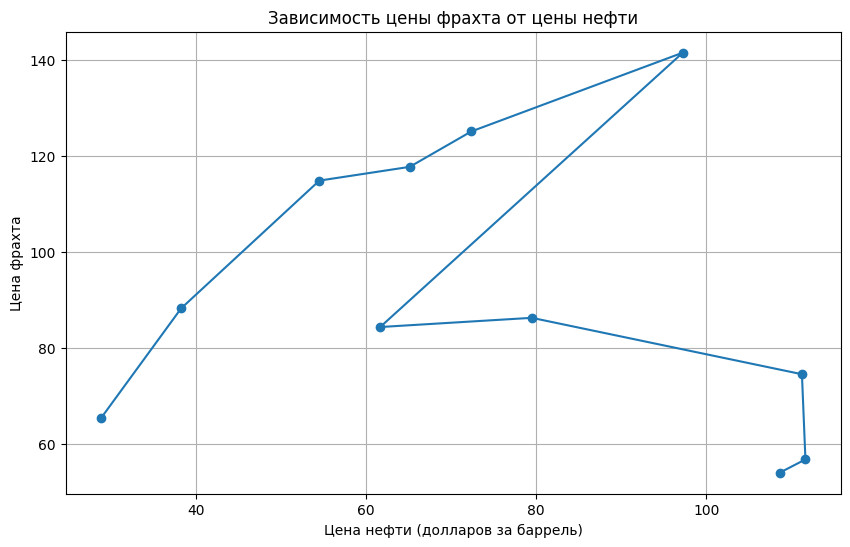

In [ ]:
# plt.figure(figsize=(10, 6))
# plt.plot(merged_df['Oil'], merged_df['Freight'], marker='o')
# plt.title('Зависимость цены фрахта от цены нефти')
# plt.xlabel('Цена нефти (долларов за баррель)')
# plt.ylabel('Цена фрахта')
# plt.grid(True)